# Problem 1

p_value for Shapiro-Wilk test of density values : 0.051220282912254333
p_value for Shapiro-Wilk test of natural logarithm of density values : 0.5660613775253296

As the p-value for the log(density values) is greater it cannot reject the null hypothesis and more close to the gaussian distribution


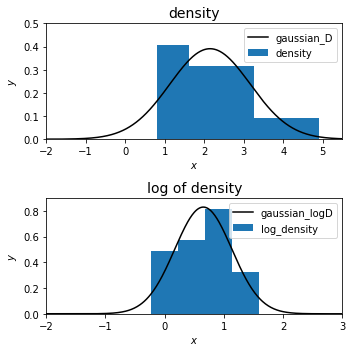

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# reading data from local device
file = open('data.txt', 'r')
lines = file.readlines()
file.close()

data = []
for line in lines:
    line = line.split(' ')[1]
    line = line.split('\n')[0]
    data.append(line)

data = np.asarray(data, dtype = float)
log_data = np.log(data)

W1, p_D = stats.shapiro(data) # for density values
W2, p_logD = stats.shapiro(log_data) # for natural logarithm of density values

print('p_value for Shapiro-Wilk test of density values :', p_D)
print('p_value for Shapiro-Wilk test of natural logarithm of density values :', p_logD)

print('\nAs the p-value for the log(density values) is greater it cannot reject the null hypothesis and more close to the gaussian distribution')

mu_D, sigma_D = stats.norm.fit(data)
mu_logD, sigma_logD = stats.norm.fit(log_data)

x = np.linspace(-6, 6, 1000)

# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

ax = fig.add_subplot(2, 1, 1)

ax.hist(data, bins = 'fd', histtype = 'stepfilled', alpha = 1, density = True, label = 'density')
ax.plot(x, stats.norm.pdf(x, mu_D, sigma_D), '-k', label = 'gaussian_D')
ax.set_xlim(-2, 5.5)
ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('density', fontsize = 14)
ax.legend(loc = 'upper right')

ax = fig.add_subplot(2, 1, 2)
ax.hist(log_data, bins = 'fd', histtype = 'stepfilled', alpha = 1, density = True, label = 'log_density')
ax.plot(x, stats.norm.pdf(x, mu_logD, sigma_logD), '-k', label = 'gaussian_logD')
ax.set_xlim(-2, 3)
ax.set_ylim(0, 0.9)
ax.legend(loc = 'upper right')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('log of density', fontsize = 14)

plt.tight_layout()
plt.show()

# Problem 2

In [4]:
import numpy as np
import pandas as pd
from scipy import stats

# reading the data from local device
data = pd.read_csv('data1.csv')

# extracting the required data
hyades = data[(data['RA'] > 50) & (data['RA'] < 100)]
hyades = hyades[(hyades['DE'] > 0) & (hyades['DE'] < 25)]
hyades = hyades[(hyades['pmRA'] > 90) & (hyades['pmRA'] < 130)]
hyades = hyades[(hyades['pmDE'] > -60) & (hyades['pmDE'] < -10)]
hyades = hyades[(hyades['e_Plx'] < 5)]

df = pd.concat([data, hyades])
non_hyades = df.drop_duplicates(keep = False)

hyades = hyades['B-V']
non_hyades = non_hyades['B-V']

# calculating variances
var_hyades = np.var(hyades)
var_non_hyades = np.var(non_hyades)

print('variance of hyades stars is :', var_hyades)
print('variance of non-hyades stars is :', var_non_hyades)
print('The variance is different for both the hyades and non-hyades samples so we will perform Welch’s t-test\n')

t_stat, p_val = stats.ttest_ind(hyades, non_hyades, equal_var = False)

print("t-statistic : ", t_stat)
print("p-value of the two-sample t-test is : ", p_val)

print('\nAs the p-value is less than 0.05 we can reject the null hypothesis stating the means(color) of the two samples are the same.')
print('So the color of hyades and non-hyades are not the same.')

variance of hyades stars is : 0.1001435495037807
variance of non-hyades stars is : 0.10789036018860101
The variance is different for both the hyades and non-hyades samples so we will perform Welch’s t-test

t-statistic :  -4.218554822666057
p-value of the two-sample t-test is :  5.494164972994738e-05

As the p-value is less than 0.05 we can reject the null hypothesis stating the means(color) of the two samples are the same.
So the color of hyades and non-hyades are not the same.
